In [1]:
# importando bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')

In [2]:
def data_dict():
    print(''' 
    Dicionário de Variáveis:
    
    PassengerId = ID do passageiro

    Survived = Variável binária que indica se o passageiro sobreviveu ou não, sendo 1 caso tenha 
    sobrevivido

    Pclass = Classe do passageiro

    Name = Nome do passageiro

    Sex = Gênero 

    Age = Idade

    SibSp = Quantidade de familiares em relação a irmãos, irmãs, maridos e esposas

    Parch = Quantidade de familiares em relação a pai, mãe, filho e filha

    Ticket = Número do ticket

    Fare = Tarifa

    Cabin = Cabine

    Embarked = Local de embarque''')
    
    return None

In [3]:
def get_data(path):
    df = pd.read_csv(path)
    return df

In [4]:
def overview(df):
    print('\n\nVisualizando uma amostra aleatória dos dados: \n{}'.format(df.sample()))
    print('\n\nEstamos trabalhando com uma base de {} observações'.format(df.shape[0]))
    print('\n\nVerificando o tipo de dado e se haverá necessidade de transformar dados categóricos: \n {}'.format(df.dtypes))
    print('\n\nVerificando se existem dados faltantes: \n{}'.format(df.isnull().sum()))
    print('\n\nEstatísticas Descritivas: \n{}'.format(df.describe()))
    print('\n\nAproximadamente {:.2f}% da amostra sobreviveu ao Titanic'.format( len( df[ df[ 'Survived' ] == 1]) / len(df)*100))
    print('\n\nEm média as pessoas tinham {:.2f} anos de idade, sendo que a mais nova possuía {:.2f} e a mais velha {:.2f} anos. Além disso, 75% das pessoas possuíam até {} anos'.format(df.Age.mean(), df.Age.min(), df.Age.max(), np.percentile(df.Age, 75)))
    print('\n\nEm média, a tarifa foi de {:.2f}, porém 50% das pessoas pagaram até {:.2f}, sendo que alguém chegou a pagar {:.2f} e que a maioria pagou até {:.2f}, ou seja, a variância é grande'.format(df.Fare.mean(), df.Fare.median(), df.Fare.max(), np.percentile(df.Fare, 75)))
       
    return None

In [5]:
def show_missing_values(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    na_count = df[na_columns].isnull().sum().sort_values(ascending = False)
    na_rate = round( df[na_columns].isnull().sum().sort_values(ascending=False)/df.shape[0]*100, 2 )
    na_data = pd.concat( [na_count, na_rate], axis=1, keys= ['Count', 'Rate'] ) 
    print('\n\n Relação de dados faltantes por variável:\n {}'.format(na_data))
    print('\n\nEm relação aos dados faltantes, na variável {}, {}% de dados faltantes'.format(na_data.index[0], na_data.iloc[0,1]))
    print('\n\nEm relação aos dados faltantes, na variável {}, {}% de dados faltantes'.format(na_data.index[1], na_data.iloc[1,1]))
    print('\n\nEm relação aos dados faltantes, na variável {}, {}% de dados faltantes'.format(na_data.index[2], na_data.iloc[2,1]))
    
    return None

In [6]:
def dtype_config(df):
    df['Survived'] = df['Survived'].astype('O')
    df['Pclass'] = df['Pclass'].astype('O')
    df['PassengerId'] = df['PassengerId'].astype('O')
    df['Name'] = df['Name'].astype('O')
    df['Sex'] = df['Sex'].astype('O')
    df['Ticket'] = df['Ticket'].astype('O')
    df['Cabin'] = df['Cabin'].astype('O')
    df['Embarked'] = df['Embarked'].astype('O')
    
    return df

In [7]:
def fill_age(df):
    print('\n\nProcessamento de dados faltantes na variável Age:\n')
    
    plt.figure(figsize=[10, 5])
    sns.boxplot(x = "Survived", y = "Age", data = df)
    plt.title('Age Boxplot')
    plt.show()
    
    df[ 'Age' ] = df.Age.fillna( df.Age.median() )
    df['Age'] = df['Age'].astype(int)
    print('\n\nComo a distribuição da variável Age é muito semelhante em ambos os cenários da nossa variável Alvo, substituímos os valores faltantes pela mediana de cada conjunto.')
        
    return df

In [8]:
def fill_embarked(df):
    print('\n\nTratamento de valores faltantes na variável Embarked:\n')
    a = df['Pclass'] == df[df.Embarked.isnull()]['Pclass'].value_counts().index[0]
    b = df['Survived'] == df[df.Embarked.isnull()]['Survived'].value_counts().index[0]
    c = df['Sex'] == df[df.Embarked.isnull()]['Sex'].value_counts().index[0]
    
    print('\n\nCaracterísticas das observações faltantes: \n Pclass: {},\
    Survived: {}, Sex: {}'.format(df[df.Embarked.isnull()]['Pclass'].value_counts().index[0],
                                  df[df.Embarked.isnull()]['Survived'].value_counts().index[0],
                                  df[df.Embarked.isnull()]['Sex'].value_counts().index[0] ) )
    
    print('\nPreenchendo os valores faltantes com a região de embarque mais frequente das pessoas com as mesmas características...')
    df.Embarked.fillna(df[a & b & c].Embarked.value_counts().index[0], inplace = True)
    
    return df.copy()
    

In [9]:
def fill_cabin(df):
    print('\n\nTratamento de valores faltantes da variável Cabin:\n')
    print('Por se tratar de muitos dados faltantes, iremos transformar essa variável como:\n')
    print('1 = possui cabine e 0 = não possui cabine')
    
    df[ 'Cabin' ] = df.Cabin.fillna(0)
    
    for i in df.Cabin.unique():
        if i != 0:
            df.Cabin.replace(i, 1, regex = True, inplace=True )

    df['Cabin'] = df['Cabin'].astype('O')
    
    return df

In [10]:
def show_outliers(df):
    print('\n\nVisualizando Outliers:\n')
    for i in df.describe().columns.values:
        print(i)
        plt.boxplot(df[i])
        plt.show()
        
    return None

In [11]:
def outlier_process(df): 
    print('\n\nIniciando o processo de tratamento de outliers...')
    for i in df.describe().columns.values:
        Q1 = np.percentile(df[i], 25)
        Q3 = np.percentile(df[i], 75)

        LI = max( min( df[i] ), (Q1 - (1.5 * (Q3 - Q1) ) ) )
        LS = min( max( df[i] ), (Q3 + (1.5 * (Q3 - Q1) ) ) )


        for k in df[i]:
            if k < LI :
                df[i].replace(k, LI, regex = True, inplace = True)
            elif k > LS:
                df[i].replace(k, LS, regex = True, inplace = True)
            else: 
                None

        if df[i].nunique() == 1:
            df.drop(i, axis=1, inplace= True)

    print('Dessa forma, substituímos todos os valores que estavam fora do intervalo dos limites superior e inferior pelo valor desses limites. Abaixo podemos validar a ação:')
    return df

In [12]:
def EDA(df):
    print('\n\nAnalise Exploratória:\n')
    plt.figure( figsize = [10, 5])
    sns.barplot(x = 'Survived', y = 'SibSp', data = df, palette = sns.color_palette('Blues', 2))
    plt.title('Quantidade Média de Familiares', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.xlabel('Survived', fontsize = 12)
    plt.ylabel('Valor', fontsize = 12)
    plt.yticks(np.arange(0, 0.6, 0.05))
    plt.show()
    
    print('\nEm média, o grupo de sobreviventes possui familiares em maior quantidade')
    
    plt.figure( figsize = [10, 5])
    sns.barplot(x = 'Survived', y = 'Age', data = df, palette = sns.color_palette('Greens', 2))
    plt.title('Média de Idade', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.xlabel('Survived', fontsize = 12)
    plt.ylabel('Idade', fontsize = 12)
    plt.yticks(np.arange(0, 35, 5))
    plt.show()
    
    print('\nEm média, o grupo de sobreviventes possui idade mais jovem, apesar de terem a média de idade muito próxima')
    
    df.Age.hist(figsize = [10,5], bins = 10)
    plt.title('Distribuição da Idade')
    plt.show()
    
    print('\nNo geral, a maioria das pessoas possui entre 20 e 30 anos.')
    
    plt.figure( figsize = [10, 5])
    sns.barplot(x = 'Survived', y = 'Fare', data = df, palette = sns.color_palette('Oranges', 2))
    plt.title('Tarifa Média', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.xlabel('Survived', fontsize = 12)
    plt.ylabel('Tarifa', fontsize = 12)
    plt.yticks(np.arange(0, 40, 5))
    plt.show()
    
    print('\nEm média, o grupo de sobreviventes pagou mais caro da tarifa, 32 contra 18 do grupo de não sobreviventes. Cerca de 70% mais caro')
    
    plt.figure( figsize = [10, 5])
    sns.countplot(x = 'Pclass', data = df, hue = 'Survived', palette = sns.color_palette('tab20_r',2))
    plt.title('Quantidade de Passageiros Por Classe', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.xlabel('Classe', fontsize = 12)
    plt.ylabel('Quantidade', fontsize = 12)
    plt.yticks(np.arange(0, 400, 25))
    plt.legend(['Não Sobreviveu', 'Sobreviveu'])
    plt.show()

    C1 = df[df['Pclass'] == 1].Survived.value_counts() / df[df['Pclass'] == 1].shape[0] * 100
    C2 = df[df['Pclass'] == 2].Survived.value_counts() / df[df['Pclass'] == 2].shape[0] * 100
    C3 = df[df['Pclass'] == 3].Survived.value_counts() / df[df['Pclass'] == 3].shape[0] * 100
    perc_Pclass = round( pd.concat([C1, C2, C3], axis=1, keys = ['%C1', '%C2', '%C3']), 0)
    perc_Pclass['Grupo'] = ['Não Sobreviveu', 'Sobreviveu']
    perc_Pclass.set_index('Grupo', inplace=True)
    print('\nPercentual da classe em cada cenário: \n{}'.format(perc_Pclass))
    
    print('\nNesse gráfico podemos entender a distribuição de pessoas por classe e cenário. Pela tabela temos o percentual de sobreviventes em cada grupo e classe. Percebemos que a maior quantidade das pessoas estavam na classe 3 e que 63% da classe 1 sobreviveu, enquanto na classe 3 somente 24%. Hipótese: a variável classe pode ser estatísticamente significante para o modelo de previsão de sobrevivência, visto que se a pessoa for da classe A, a taxa de sobreviência é maior.')
    
    plt.figure( figsize = [10, 5])
    sns.countplot(x = 'Sex', data = df, hue = 'Survived', palette = sns.color_palette('viridis_r', 2))
    plt.title('Quantidade de Passageiros Por Gênero', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.xlabel('Gênero', fontsize = 12)
    plt.ylabel('Quantidade', fontsize = 12)
    plt.yticks(np.arange(0, 500, 25))
    plt.legend(['Não Sobreviveu', 'Sobreviveu'])
    plt.show()

    male = df[df['Sex'] == 'male'].Survived.value_counts() / df[df['Sex'] == 'male'].shape[0] * 100
    female = df[df['Sex'] == 'female'].Survived.value_counts() / df[df['Sex'] == 'female'].shape[0] * 100

    perc_Sex = round( pd.concat( [ male, female ], axis=1, keys = [ '%male', '%female' ]), 0)
    perc_Sex['Grupo'] = ['Não Sobreviveu', 'Sobreviveu']
    perc_Sex.set_index('Grupo', inplace=True)
    print('\nPercentual do gênero em cada cenário: \n{}'.format(perc_Sex))
    
    print('\nNesse gráfico podemos entender a distribuição de pessoas por gênero e cenário. Pela tabela temos o percentual de sobreviventes em cada grupo e gênero. Percebemos que a maior quantidade das pessoas eram homens. Aproximadamente 575 homens e 300 mulheres. Entretanto, somente 19% dos homens sobreviveram, enquanto 74% foi a taxa de sobreviventes no grupo das mulheres')
    
    plt.figure( figsize = [10, 5])
    sns.countplot(x = 'Embarked', data = df, hue = 'Survived', palette = sns.color_palette('Paired_r', 3))
    plt.title('Quantidade de Passageiros Por Embarque', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.xlabel('Local de Embarque', fontsize = 12)
    plt.ylabel('Quantidade', fontsize = 12)
    plt.yticks(np.arange(0, 500, 25))
    plt.legend(['Não Sobreviveu', 'Sobreviveu'])
    plt.show()

    C = df[df['Embarked'] == 'C'].Survived.value_counts() / df[df['Embarked'] == 'C'].shape[0] * 100
    Q = df[df['Embarked'] == 'Q'].Survived.value_counts() / df[df['Embarked'] == 'Q'].shape[0] * 100
    S = df[df['Embarked'] == 'S'].Survived.value_counts() / df[df['Embarked'] == 'S'].shape[0] * 100

    perc_Embarked = round( pd.concat([S, C, Q], axis=1, keys = ['S', 'C', 'Q']), 0)
    perc_Embarked['Grupo'] = ['Não Sobreviveu', 'Sobreviveu']
    perc_Embarked.set_index('Grupo', inplace=True)
    print('\nPercentual por local de embarque em cada cenário: \n{}'.format(perc_Embarked))
    
    print('\nNesse gráfico podemos entender a distribuição de pessoas por local de embarque e cenário. Pela tabela temos o percentual de sobreviventes em cada grupo e local de embarque. Percebemos que a maior quantidade das pessoas embarcaram no local S e que somente o local C possui mais de 50% de sobreviventes')
    
    
    return None

In [13]:
def feature_engineering(df):   
    try:
        print('\n\nCriando Novas Variáveis...\n')
        print('\nCriando uma variável que determina se a pessoa estava sozinha ou com familiares...')
        print('\nCriando uma variável que determina o Título da pessoa (Ms, Miss, Mrs...)...')
        print('\nCriando uma variável que indica a quantidade de letras do nome...')
        print('\nCriando uma variável que indica a quantidade de nomes no nome...')

        df['Alone'] = pd.Series(np.arange(0, len(df)))

        for i in df.Alone:       
            if df.loc[i, 'SibSp'] == 0:
                df.loc[i, 'Alone'] = 1
            else:
                df.loc[i, 'Alone'] = 0

        df['Title'] = df.Name.str.split(',').str.get(1)
        df['Title'] = df.Title.str.split('.').str.get(0)
        df['Title'] = df.Title.replace('Mlle', 'Miss', regex = True)
        df['Title'] = df.Title.replace('Ms', 'Miss', regex = True)
        df['Title'] = df.Title.replace('Mme', 'Mrs', regex = True)
        df['Title'] = df.Title.replace('Lady', 'Miss', regex = True)
        df['Title'] = df.Title.replace(['Dr', 'Rev', 'Major', 'Col', 'Don', 'the Countess', 'Sir',\
                                       'Capt', 'Jonkheer', 'Master'], 'Other', regex = True)

        df['NameSize'] = df.Name.str.len()
        df['NameCount'] = df.Name.str.split(' ').str.len()

        print('\nRemovendo variáveis irrelevantes como Passenger Id, Name e Ticket...')
        df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

        print('\nSalvando a base de dados antes de tratar variáveis dummies...')
        df.to_csv(os.path.join(os.path.dirname(os.getcwd()), 'data\\processed_train_data.csv'), index = False)

        print('Dados salvos como "processed_train_data.csv"...')

        print('\nCriando variáveis dummies para dados categóricos...')
        df_dumm = pd.get_dummies( data = df, columns = ['Pclass', 'Sex', 'Embarked', 'Title'], drop_first=True)
    except:
        print('Erro')

    return df_dumm

 
    Dicionário de Variáveis:
    
    PassengerId = ID do passageiro

    Survived = Variável binária que indica se o passageiro sobreviveu ou não, sendo 1 caso tenha 
    sobrevivido

    Pclass = Classe do passageiro

    Name = Nome do passageiro

    Sex = Gênero 

    Age = Idade

    SibSp = Quantidade de familiares em relação a irmãos, irmãs, maridos e esposas

    Parch = Quantidade de familiares em relação a pai, mãe, filho e filha

    Ticket = Número do ticket

    Fare = Tarifa

    Cabin = Cabine

    Embarked = Local de embarque


Visualizando uma amostra aleatória dos dados: 
     PassengerId  Survived  Pclass                       Name   Sex   Age  \
232          233         0       2  Sjostedt, Mr. Ernst Adolf  male  59.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
232      0      0  237442  13.5   NaN        S  


Estamos trabalhando com uma base de 891 observações


Verificando o tipo de dado e se haverá necessidade de transformar dados categóricos: 
 Pass

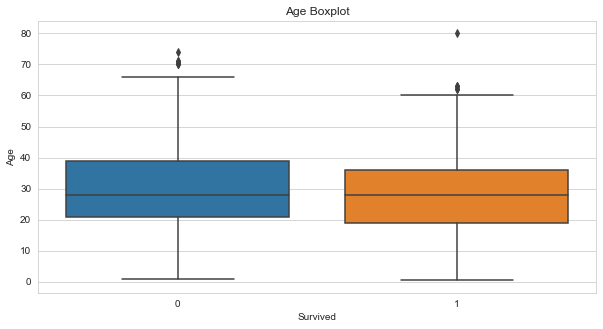



Como a distribuição da variável Age é muito semelhante em ambos os cenários da nossa variável Alvo, substituímos os valores faltantes pela mediana de cada conjunto.


Tratamento de valores faltantes na variável Embarked:



Características das observações faltantes: 
 Pclass: 1,    Survived: 1, Sex: female

Preenchendo os valores faltantes com a região de embarque mais frequente das pessoas com as mesmas características...


Tratamento de valores faltantes da variável Cabin:

Por se tratar de muitos dados faltantes, iremos transformar essa variável como:

1 = possui cabine e 0 = não possui cabine


Visualizando Outliers:

Age


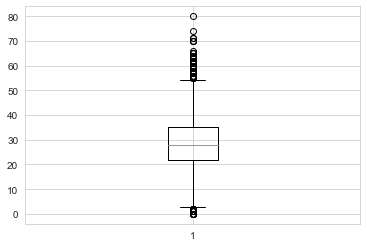

SibSp


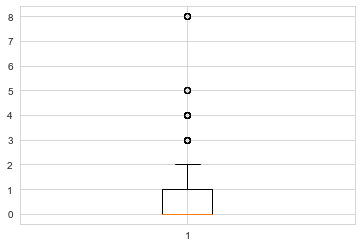

Parch


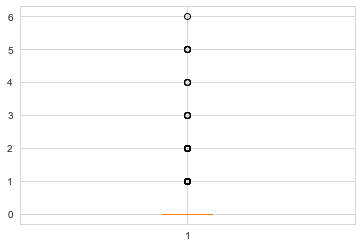

Fare


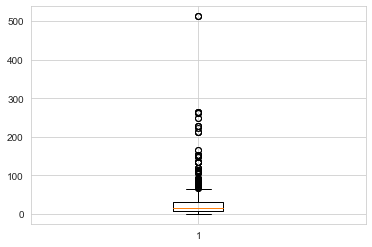



Iniciando o processo de tratamento de outliers...
Dessa forma, substituímos todos os valores que estavam fora do intervalo dos limites superior e inferior pelo valor desses limites. Abaixo podemos validar a ação:


Visualizando Outliers:

Age


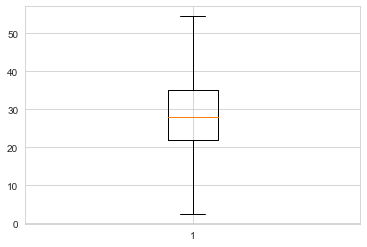

SibSp


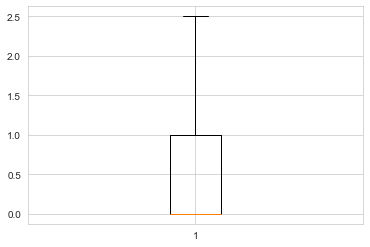

Fare


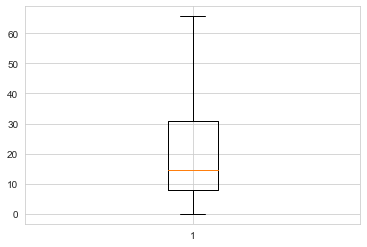



Analise Exploratória:



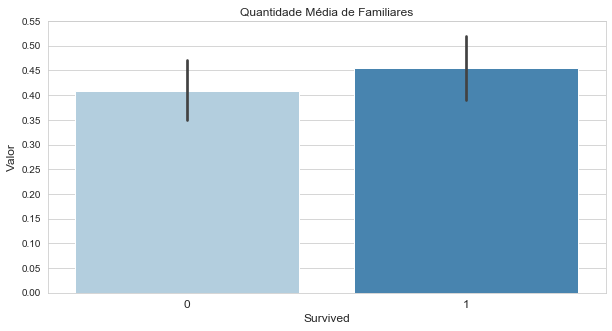


Em média, o grupo de sobreviventes possui familiares em maior quantidade


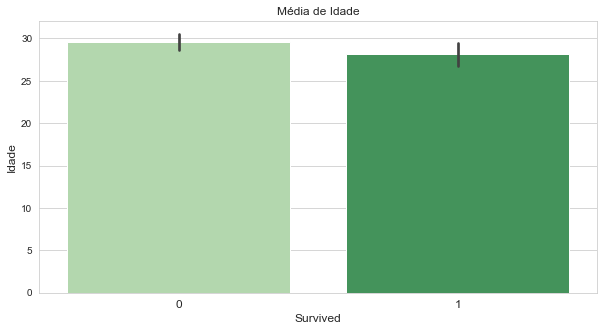


Em média, o grupo de sobreviventes possui idade mais jovem, apesar de terem a média de idade muito próxima


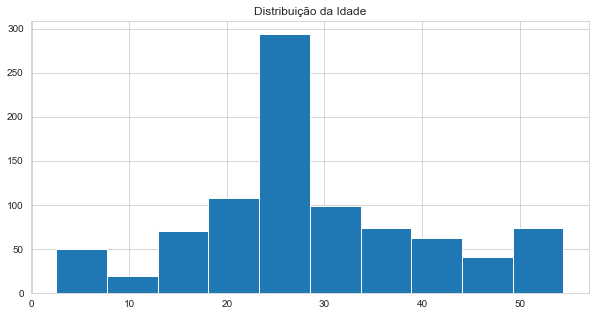


No geral, a maioria das pessoas possui entre 20 e 30 anos.


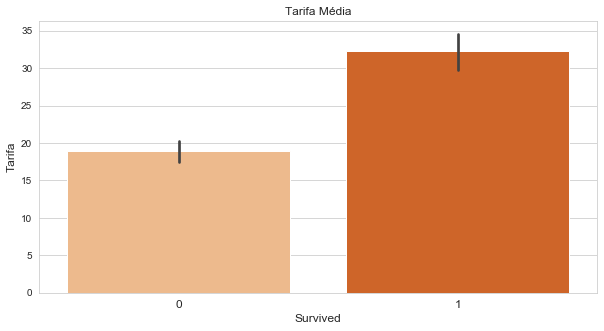


Em média, o grupo de sobreviventes pagou mais caro da tarifa, 32 contra 18 do grupo de não sobreviventes. Cerca de 70% mais caro


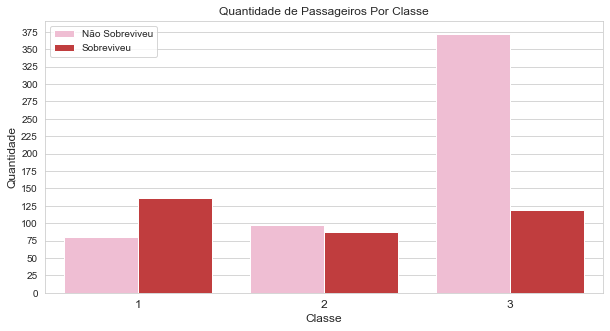


Percentual da classe em cada cenário: 
                 %C1   %C2   %C3
Grupo                           
Não Sobreviveu  37.0  53.0  76.0
Sobreviveu      63.0  47.0  24.0

Nesse gráfico podemos entender a distribuição de pessoas por classe e cenário. Pela tabela temos o percentual de sobreviventes em cada grupo e classe. Percebemos que a maior quantidade das pessoas estavam na classe 3 e que 63% da classe 1 sobreviveu, enquanto na classe 3 somente 24%


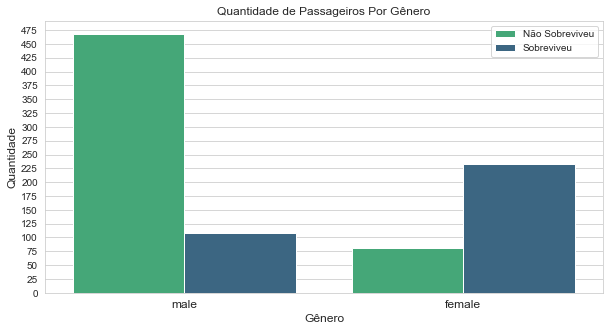


Percentual do gênero em cada cenário: 
                %male  %female
Grupo                         
Não Sobreviveu   81.0     26.0
Sobreviveu       19.0     74.0

Nesse gráfico podemos entender a distribuição de pessoas por gênero e cenário. Pela tabela temos o percentual de sobreviventes em cada grupo e gênero. Percebemos que a maior quantidade das pessoas eram homens. Aproximadamente 575 homens e 300 mulheres. Entretanto, somente 19% dos homens sobreviveram, enquanto 74% foi a taxa de sobreviventes no grupo das mulheres


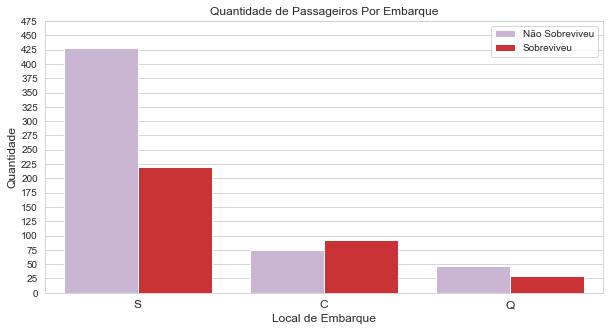


Percentual por local de embarque em cada cenário: 
                   S     C     Q
Grupo                           
Não Sobreviveu  66.0  45.0  61.0
Sobreviveu      34.0  55.0  39.0

Nesse gráfico podemos entender a distribuição de pessoas por local de embarque e cenário. Pela tabela temos o percentual de sobreviventes em cada grupo e local de embarque. Percebemos que a maior quantidade das pessoas embarcaram no local S e que somente o local C possui mais de 50% de sobreviventes


Criando Novas Variáveis...


Criando uma variável que determina se a pessoa estava sozinha ou com familiares...

Criando uma variável que determina o Título da pessoa (Ms, Miss, Mrs...)...

Criando uma variável que indica a quantidade de letras do nome...

Criando uma variável que indica a quantidade de nomes no nome...

Removendo variáveis irrelevantes como Passenger Id, Name e Ticket...

Salvando a base de dados antes de tratar variáveis dummies...
Dados salvos como "processed_train_data.csv"...

Criando 

In [14]:
if __name__ == '__main__':
    
    data_dict()
    data = get_data( path = os.path.join(os.path.dirname(os.getcwd()), 'data\\train.csv')  )
    overview( data )
    show_missing_values( data )
    
    data = dtype_config( data )
    data = fill_age( data )
    data = fill_embarked( data )
    data = fill_cabin( data )
    show_outliers( data )
    data = outlier_process( data )
    show_outliers( data )
    
    EDA( data )
    
    data = feature_engineering( data )
    overview( data )